In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
e_db=automap_base()
# reflect the tables
e_db.prepare(engine, reflect=True)

In [32]:
# View all of the classes that automap found
e_db.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measure_ref=e_db.classes.measurement
Station_ref=e_db.classes.station

In [34]:
# Create our session (link) from Python to the DB
session_link=Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
engine.execute('Select max(date)FROM Measurement').fetchall()

[('2017-08-23',)]

<function matplotlib.pyplot.show(close=None, block=None)>

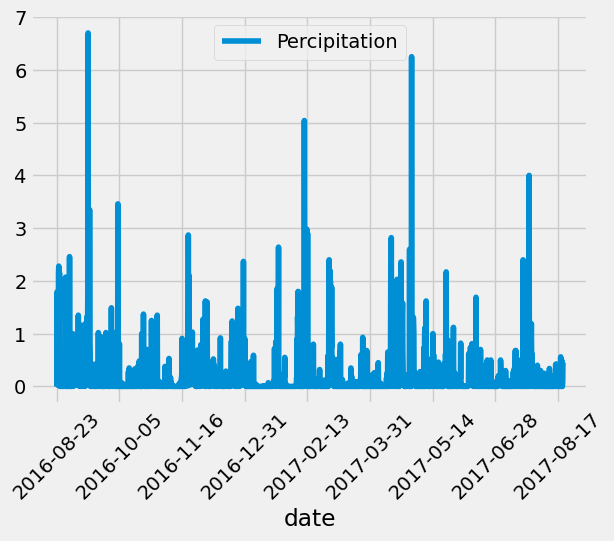

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
Percipitation_data=session_link.query(Measure_ref.date, Measure_ref.prcp).filter(Measure_ref.date>="2016-08-23").\
    filter(Measure_ref.date<="2017-08-23").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Percipitation_df=pd.DataFrame(Percipitation_data).set_index("date")
Percipitation_df=Percipitation_df.rename(columns={"prcp":"Percipitation"})

# Sort the dataframe by date

Percipitation_df=Percipitation_df.sort_values(by="date").dropna()
# Use Pandas Plotting with Matplotlib to plot the data
Percipitation_df.plot(rot=45)
plt.savefig("Percipitation Data Analysis Bar Plot.png")
plt.show

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
Percipitation_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations= session_link.query(Station_ref.id).count()
number_of_stations

9

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session_link.query(Measure_ref.station, func.count(Measure_ref.station)).\
group_by(Measure_ref.station).order_by(func.count(Measure_ref.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_Sid="USC00519281"
session_link.query(func.min(Measure_ref.tobs),
                  func.max(Measure_ref.tobs),
                  func.avg(Measure_ref.tobs)).filter(Measure_ref.station==most_active_Sid).all()


[(54.0, 85.0, 71.66378066378067)]

(0.0, 90.0)

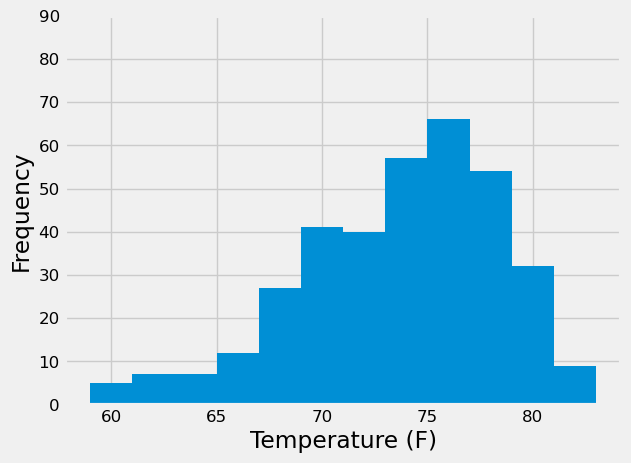

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_data=session_link.query(Measure_ref.date,Measure_ref.tobs).\
    filter(Measure_ref.station == most_active_Sid).\
    filter(Measure_ref.date > '2016-08-17').all()

Temp_df=pd.DataFrame(Temp_data)["tobs"]
Temp_df
histogram = Temp_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,90)

# Close Session

In [47]:
# Close Session
session_link.close()